#### RVModel fit to observed HAT-P2 data 

Data are from Table 1 of [Lewis et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014ApJ...795..150L/abstract).

The linear trend due to a putative 3rd body, $\dot{\gamma}=-0.088$m/s/d, is subtracted off the data before fitting.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pycheops.models import RVModel
from lmfit import report_fit


In [2]:
T_0 = 55288.84923
P = 5.6334729
ecc = 0.50910
omega = 188.09
K = 923.0
gamma = 248.0
gamma_dot = -0.088



In [3]:
rvdata = np.loadtxt('HAT-P2_rv.csv',delimiter=',')
bjd = rvdata[:,0]
rv  = rvdata[:,1] - gamma_dot * (bjd-T_0)
rverr = rvdata[:,2]

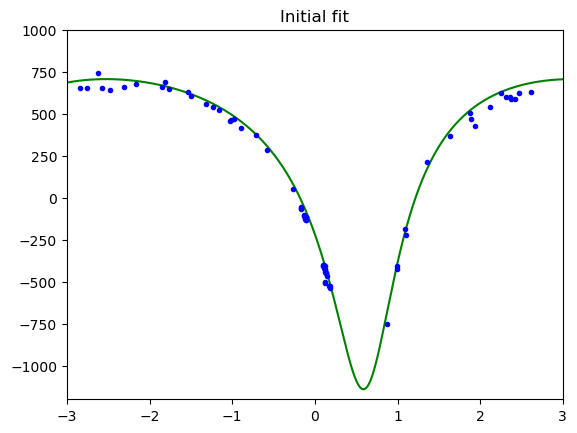

In [4]:
m = RVModel(prefix='t_') 
f_c = np.sqrt(ecc)*np.cos(omega*np.pi/180)
f_s = np.sqrt(ecc)*np.sin(omega*np.pi/180)
pars = m.make_params(T_0=T_0, P=P, K=K, f_c=f_c, f_s=f_s, V_0=gamma)
pars['t_P'].set(value=P, vary=False)

t_obs = (((bjd-T_0) + 3) % P) - 3
fig,ax=plt.subplots()
ax.errorbar(t_obs, rv, yerr=rverr,fmt='bo',ms=3)
t_plt = np.linspace(-3,3,65536)
rv_plot = m.eval(pars,t=t_plt+T_0)
ax.plot(t_plt, rv_plot,c='g')
ax.set_xlim(-3,3)
ax.set_ylim(-1200,1000)
ax.set_title('Initial fit');

In [5]:
result = m.fit(rv, pars, t=bjd, weights=1/rverr)
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 71
    # variables        = 3
    chi-square         = 957.690519
    reduced chi-square = 14.0836841
    Akaike info crit   = 190.730981
    Bayesian info crit = 197.519020
    R-squared          = 0.99993502
[[Variables]]
    t_T_0:    55288.8436 +/- 0.00508238 (0.00%) (init = 55288.85)
    t_P:      5.633473 (fixed)
    t_V_0:    217.799959 +/- 3.33975325 (1.53%) (init = 248)
    t_K:      913.340786 +/- 7.51210997 (0.82%) (init = 923)
    t_f_c:   -0.7064117 (fixed)
    t_f_s:   -0.1004115 (fixed)
    t_sini:   1 (fixed)
    t_q:      0 (fixed)
    t_e:      0.50910000 +/- 0.00000000 (0.00%) == 't_f_c**2 + t_f_s**2'
    t_omega: -171.910000 +/- 0.00000000 (0.00%) == '180*atan2(t_f_s, t_f_c)/pi'
[[Correlations]] (unreported correlations are < 0.100)
    C(t_T_0, t_K)   = +0.6534
    C(t_T_0, t_V_0) = -0.3893


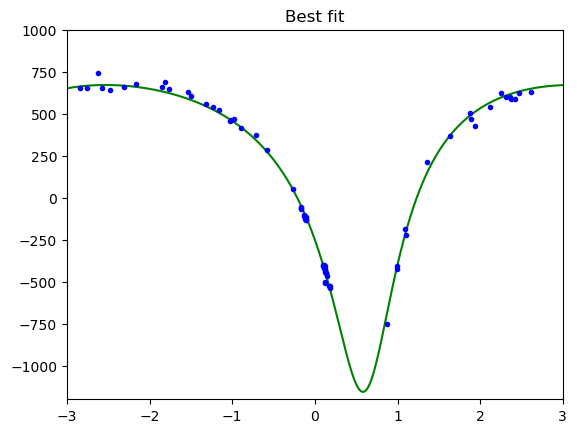

In [6]:
fig,ax=plt.subplots()
ax.errorbar(t_obs, rv, yerr=rverr,fmt='bo',ms=3)
rv_plot = m.eval(result.params,t=t_plt+T_0)
ax.plot(t_plt, rv_plot,c='g')
ax.set_xlim(-3,3)
ax.set_ylim(-1200,1000)
ax.set_title('Best fit');

&copy; Pierre Maxted, Keele University, 2024